In [203]:
#!conda install --yes -c conda-forge cufflinks-py

In [204]:
import os

#import cupy as cp
import pandas as pd
#import cudf
#import dask_cudf
import numpy as np
import time

import cufflinks as cf
import plotly.offline as plyo
#pd.options.plotting.backend = "plotly"
cf.go_offline()

from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline

In [205]:
df_BTC_USD_daily = pd.read_csv('crypto_data/Binance_BTCUSDT_d.csv', skiprows=1)
s = time.time()
e = time.time()    
print("Pandas Time = {}".format(e-s))

Pandas Time = 5.030632019042969e-05


In [206]:
df_BTC_USD_daily.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.611187e+12,2021-01-21 00:00:00,BTC/USDT,35468.23,35600.00,35304.63,35319.06,307.752511,1.091121e+07,10161.0
1,1.611101e+12,2021-01-20 00:00:00,BTC/USDT,35901.94,36415.31,33400.00,35468.23,89368.422918,3.126721e+09,2234539.0
2,1.611014e+12,2021-01-19 00:00:00,BTC/USDT,36622.46,37850.00,35844.06,35891.49,79611.307769,2.935348e+09,1939371.0
3,1.610928e+12,2021-01-18 00:00:00,BTC/USDT,35824.99,37469.83,34800.00,36631.27,70698.118750,2.554843e+09,1707766.0
4,1.610842e+12,2021-01-17 00:00:00,BTC/USDT,35994.98,36852.50,33850.00,35828.61,80157.727384,2.843103e+09,1860642.0


In [207]:
df_BTC_USD_daily.describe()

,unix,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,1.255000e+03,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1.131000e+03
mean,1.408150e+12,8997.216932,9271.379044,8686.398733,9021.788510,45626.800031,4.717578e+08,5.154053e+05
std,4.667163e+11,5081.027649,5312.224687,4807.335260,5133.340739,34889.453619,6.460202e+08,4.662954e+05
min,1.502928e+09,3189.020000,3276.500000,2817.000000,3189.020000,225.760000,9.677533e+05,1.016100e+04
25%,1.529928e+12,6391.540000,6537.500000,6260.500000,6393.135000,25434.349423,1.708942e+08,2.159290e+05
50%,1.557014e+12,8184.970000,8382.800000,7954.000000,8187.170000,38896.639746,3.073169e+08,3.573820e+05
75%,1.584101e+12,10235.730000,10455.000000,9900.000000,10242.875000,59211.513017,5.189953e+08,6.468370e+05
max,1.611187e+12,40586.960000,41950.000000,38720.000000,40582.810000,402201.673764,8.426880e+09,4.431451e+06


In [208]:
df_BTC_USD_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1255 non-null   float64
 1   date         1255 non-null   object 
 2   symbol       1255 non-null   object 
 3   open         1255 non-null   float64
 4   high         1255 non-null   float64
 5   low          1255 non-null   float64
 6   close        1255 non-null   float64
 7   Volume BTC   1255 non-null   float64
 8   Volume USDT  1255 non-null   float64
 9   tradecount   1131 non-null   float64
dtypes: float64(8), object(2)
memory usage: 98.2+ KB


It appears that there are some missing trade count values though other values seem ok

In [209]:
df_BTC_USD_daily.isna().sum()

unix             0
date             0
symbol           0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64

In [210]:
# it appears that there are null values for trade count. Lets see where they are.
# TODO: ensure that the tradecounts are only for early data
# TODO: can fill with the average?
df_BTC_USD_daily[df_BTC_USD_daily['tradecount'].isna()]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
1131,1.513555e+09,2017-12-18,BTC/USDT,18860.02,19300.00,17029.98,18856.25,10280.98,1.900573e+08,NaN
1132,1.513469e+09,2017-12-17,BTC/USDT,19102.66,19798.68,18510.00,18860.02,8980.73,1.721134e+08,NaN
1133,1.513382e+09,2017-12-16,BTC/USDT,17539.83,19539.00,17190.01,19102.66,4118.28,7.473658e+07,NaN
1134,1.513296e+09,2017-12-15,BTC/USDT,16334.98,17991.00,16298.45,17539.83,8999.13,1.566451e+08,NaN
1135,1.513210e+09,2017-12-14,BTC/USDT,16033.29,16445.00,15450.00,16334.98,11220.26,1.797144e+08,NaN
...,...,...,...,...,...,...,...,...,...,...
1250,1.503274e+09,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2.770592e+06,NaN
1251,1.503187e+09,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1.915636e+06,NaN
1252,1.503101e+09,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1.508239e+06,NaN
1253,1.503014e+09,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4.994494e+06,NaN


In [211]:
# new we know the data positions for timeseries lets re ingest it
df_BTC_USD_daily = pd.read_csv('crypto_data/Binance_BTCUSDT_d.csv', skiprows=1, index_col=1, parse_dates=True)

In [212]:
df_BTC_USD_daily

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2021-01-21,1.611187e+12,BTC/USDT,35468.23,35600.00,35304.63,35319.06,307.752511,1.091121e+07,10161.0
2021-01-20,1.611101e+12,BTC/USDT,35901.94,36415.31,33400.00,35468.23,89368.422918,3.126721e+09,2234539.0
2021-01-19,1.611014e+12,BTC/USDT,36622.46,37850.00,35844.06,35891.49,79611.307769,2.935348e+09,1939371.0
2021-01-18,1.610928e+12,BTC/USDT,35824.99,37469.83,34800.00,36631.27,70698.118750,2.554843e+09,1707766.0
2021-01-17,1.610842e+12,BTC/USDT,35994.98,36852.50,33850.00,35828.61,80157.727384,2.843103e+09,1860642.0
...,...,...,...,...,...,...,...,...,...
2017-08-21,1.503274e+09,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
2017-08-20,1.503187e+09,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
2017-08-19,1.503101e+09,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN


In [213]:
df_olhc = df_BTC_USD_daily[['open','high','low','close']]

In [214]:
df_olhc.head()

,open,high,low,close
date,,,,
2021-01-21,35468.23,35600.00,35304.63,35319.06
2021-01-20,35901.94,36415.31,33400.00,35468.23
2021-01-19,36622.46,37850.00,35844.06,35891.49
2021-01-18,35824.99,37469.83,34800.00,36631.27
2021-01-17,35994.98,36852.50,33850.00,35828.61


In [215]:
df_olhc.tail()

,open,high,low,close
date,,,,
2017-08-21,4086.29,4119.62,3911.79,4016.00
2017-08-20,4139.98,4211.08,4032.62,4086.29
2017-08-19,4108.37,4184.69,3850.00,4139.98
2017-08-18,4285.08,4371.52,3938.77,4108.37
2017-08-17,4469.93,4485.39,4200.74,4285.08


In [216]:
qf = cf.QuantFig(
    df_olhc.iloc[:50],
    title='BTC/USD Exchange Rate - Daily',
    legend='top',
    name='BTC/USD'
)

In [217]:
plyo.iplot(
    qf.iplot(asFigure=True),
    #image='png',
    #filename='btc_01'
)

In [218]:
df_olhc.pct_change().head()

,open,high,low,close
date,,,,
2021-01-21,NaN,NaN,NaN,NaN
2021-01-20,0.012228,0.022902,-0.053948,0.004223
2021-01-19,0.020069,0.039398,0.073175,0.011933
2021-01-18,-0.021775,-0.010044,-0.029128,0.020612
2021-01-17,0.004745,-0.016475,-0.027299,-0.021912


In [268]:
df_BTC_close_daily = pd.DataFrame(df_olhc['close'])
plyo.iplot(
    df_BTC_close_daily.iplot(asFigure=True)
)

In [258]:
window = 20
df_BTC_close_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_BTC_close_daily['min']  = df_BTC_close_daily['close'].rolling(window=window).min()
df_BTC_close_daily['max']  = df_BTC_close_daily['close'].rolling(window=window).max()
df_BTC_close_daily['mean']  = df_BTC_close_daily['close'].rolling(window=window).mean()
df_BTC_close_daily['median']  = df_BTC_close_daily['close'].rolling(window=window).median()
df_BTC_close_daily['ewma']  = df_BTC_close_daily['close'].ewm(halflife=0.5, min_periods=window).mean()

In [259]:
df_BTC_close_daily.head(100)

,close,ewma,max,mean,median,min
date,,,,,,
2017-08-17,4285.08,NaN,NaN,NaN,NaN,NaN
2017-08-18,4108.37,NaN,NaN,NaN,NaN,NaN
2017-08-19,4139.98,NaN,NaN,NaN,NaN,NaN
2017-08-20,4086.29,NaN,NaN,NaN,NaN,NaN
2017-08-21,4016.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-11-20,8212.00,8150.124753,8212.0,7120.8990,7097.515,5811.03
2017-11-21,8119.51,8127.163688,8212.0,7189.1755,7177.550,5811.03
2017-11-22,8205.92,8186.230922,8212.0,7248.4725,7271.530,5811.03


<AxesSubplot:xlabel='date'>

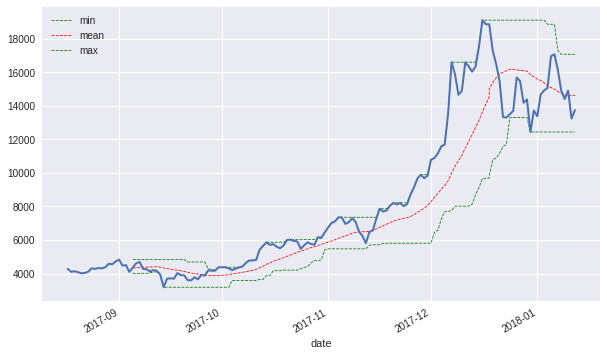

In [260]:
pd.options.plotting.backend='matplotlib' 
ax = df_BTC_close_daily[['min','mean','max']].iloc[:150].plot(figsize=(10,6),style=['g--','r--','g--'],lw=0.8)
df_BTC_close_daily['close'].iloc[:150].plot(ax=ax, lw=2.0)

In [273]:
df_BTC_USD_daily['USD_avg_tradesize'] = df_BTC_USD_daily['Volume USDT'] / df_BTC_USD_daily['tradecount']

df_BTC_close_trades_daily = pd.DataFrame(df_BTC_USD_daily[['close','tradecount','USD_avg_tradesize']])
plyo.iplot(
    df_BTC_close_trades_daily.iplot(asFigure=True,
    subplots=True)
)

Trades seem to correlate with volume, could test that. Is that like liquidity re the tel aviv market study? What about the average trade size, that seems to have increased too.

<AxesSubplot:xlabel='date'>

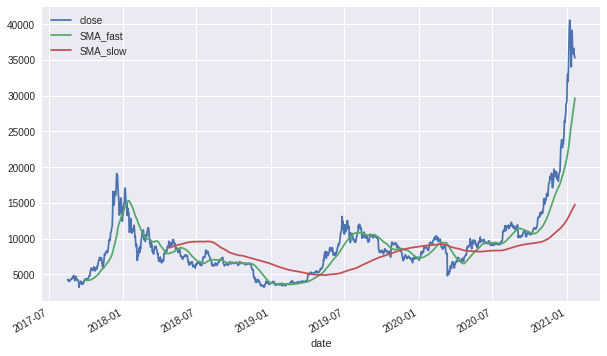

In [280]:
df_BTC_close_daily.sort_index(axis=0 ,ascending=True, inplace=True)
df_BTC_close_daily['SMA_fast'] = df_BTC_close_daily['close'].rolling(window=42).mean()
df_BTC_close_daily['SMA_slow'] = df_BTC_close_daily['close'].rolling(window=252).mean()
df_BTC_close_daily[['close','SMA_fast','SMA_slow']].plot(figsize=(10,6))

In [251]:
df_BTC_USD_hourly = pd.read_csv('crypto_data/Binance_BTCUSDT_1h.csv', skiprows=0, index_col=1, parse_dates=True)

In [140]:
df_BTC_USD_hourly.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2021-01-21 00:00:00,1.611187e+12,BTC/USDT,35468.23,35600.00,35338.16,35340.70,248.863628,8.829792e+06,8456.0
2021-01-20 23:00:00,1.611184e+12,BTC/USDT,34955.94,35670.00,34798.39,35468.23,3448.600995,1.221199e+08,84665.0
2021-01-20 22:00:00,1.611180e+12,BTC/USDT,34892.90,35100.00,34748.09,34954.86,1119.622182,3.915307e+07,47851.0
2021-01-20 21:00:00,1.611176e+12,BTC/USDT,34957.15,35110.82,34482.75,34892.89,2130.648407,7.405330e+07,61510.0
2021-01-20 20:00:00,1.611173e+12,BTC/USDT,35197.12,35318.39,34734.97,34957.15,1987.730256,6.962113e+07,74431.0


In [141]:
df_BTC_USD_hourly.isna().sum() # TODO: why are there lots of tradecounts missing

unix               0
symbol             0
open               0
high               0
low                0
close              0
Volume BTC         0
Volume USDT        0
tradecount     28584
dtype: int64

In [142]:
df_BTC_USD_hourly.describe()

,unix,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,3.270900e+04,32709.00000,32709.000000,32709.000000,32709.000000,32709.000000,3.270900e+04,4125.000000
mean,2.036106e+11,9220.73298,9275.087849,9161.049287,9221.619803,1870.924915,2.000140e+07,51975.029333
std,5.319001e+11,4915.65155,4962.209419,4862.305737,4917.979817,1999.984415,3.207474e+07,35459.751999
min,1.502942e+09,2919.00000,2950.000000,2817.000000,2919.000000,0.000000,0.000000e+00,0.000000
25%,1.532394e+09,6494.99000,6519.000000,6471.120000,6494.990000,805.420000,5.746229e+06,28403.000000
50%,1.561831e+09,8570.88000,8629.310000,8520.580000,8570.880000,1365.510000,1.128950e+07,41876.000000
75%,1.591268e+09,10715.91000,10757.930000,10664.630000,10715.910000,2267.190000,2.163189e+07,64950.000000
max,1.611187e+12,41454.13000,41950.000000,40970.220000,41454.130000,47255.760000,7.548817e+08,352801.000000


In [143]:
df_olhc_hourly = df_BTC_USD_hourly[['open','high','low','close']]

In [144]:
qf_hourly = cf.QuantFig(
    df_olhc_hourly.iloc[:50],
    title='BTC/USD Exchange Rate - Hourly',
    legend='top',
    name='BTC/USD'
)

In [145]:
plyo.iplot(
    qf_hourly.iplot(asFigure=True),
    #image='png',
    #filename='btc_01'
)